In [1]:
import csv

import numpy as np
import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [11]:
!head one.csv

-13	1	12/01/48	An Esteemed Correspondent	J. Alsop ;Digamma *;Thomas Cranstoun *;John Giblin *;J.M. *	1;	Jan-49;	xx;xx	41;
-12	1	01/01/49	T. Morley	Unknown ;T.J.L. 	1;	Feb-49;Feb-49	xx;xx	9;
-11	1	02/01/49	T.J.L. 	J.W. 	1	03/01/49	xx	41
-10	1	02/01/49	Enquirer	T. Morley 	1	03/01/49	xx	22
-9	1	03/01/49	Thomas Morley	J.W. 	1	04/01/49	xx	22
-8	1	04/01/49	Thomas Morley	UNKNOWN;UNKNOWN	1;1	May-49;Jun-49	xx;xx	41;
-7	1	04/01/49	Collegian	J.W. 	1	05/01/49	xx	22
-6	1	05/01/49	Gomphos					3
-5	1	05/01/49	S.A.G.					74
-4	1	06/01/49	Geometricus	 UNKNOWN	1	07/01/49	xx	47


In [12]:
#first create list using all columns
allData = []
with open('one.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    #next(filereader) # skips header row, we don't want to skip since we don't have a header
    for row in filereader:
            allData.append(row)
            #for this practice, lets keep seperate data by ranges of dates and we can compare them!  nifty!
fortyNine = []
edge = []
i=0
for x in allData:
    date=x[2].split("/")
    if len(date)==3:
        if date[2]=="49":
            edge.append([x[3],x[4]])
            fortyNine.append(edge[i])
            i=i+1
#fix the solver column!
fixedSolver = []
edge = []
i=0
#once sorted for date, we can remove whitespace
#I done like using replace, but couldn't get split to work :( sad - this should be ok for now

#can add to this array of strings as we find more ways that James Tattersall labeled unknown authors
unknown = {"", "Unknown", "unknown"}
for x in fortyNine:
    if ";" in x[1]:
        solvers = x[1].split(";")
        for y in solvers:
            one=x[0].replace(' ', '')
            two=y.replace(' ', '')
            if(one in unknown):
                one="UNKNOWN"
            if(two in unknown):
                two="UNKNOWN"
            fixedSolver.append([one,two])
    else:
        one=x[0].replace(' ', '')
        two=x[1].replace(' ', '')
        if(one in unknown):
            one="UNKNOWN"
        if(two in unknown):
            two="UNKNOWN"
        fixedSolver.append([one,two])
    #i=i+1

In [13]:
fixedSolver

[['T.Morley', 'UNKNOWN'],
 ['T.Morley', 'T.J.L.'],
 ['T.J.L.', 'J.W.'],
 ['Enquirer', 'T.Morley'],
 ['ThomasMorley', 'J.W.'],
 ['ThomasMorley', 'UNKNOWN'],
 ['ThomasMorley', 'UNKNOWN'],
 ['Collegian', 'J.W.'],
 ['Gomphos', 'UNKNOWN'],
 ['S.A.G.', 'UNKNOWN'],
 ['Geometricus', 'UNKNOWN'],
 ['UNKNOWN', 'J.W.'],
 ['Geometricus', 'UNKNOWN'],
 ['J.W.', 'UNKNOWN'],
 ['Geometricus', 'ThomasWilkinson'],
 ['Philo-Mathematicus', 'ThomasWilkinson'],
 ['UNKNOWN', 'UNKNOWN'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['Geometricus', 'ThomasWilkinson'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['ThomasMorley', 'J.S.'],
 ['ThomasMorley', 'ThomasWilkinson*'],
 ['ThomasMorley', 'J.M.[fromPlymouth]*'],
 ['ThomasWilkinson', 'Tho

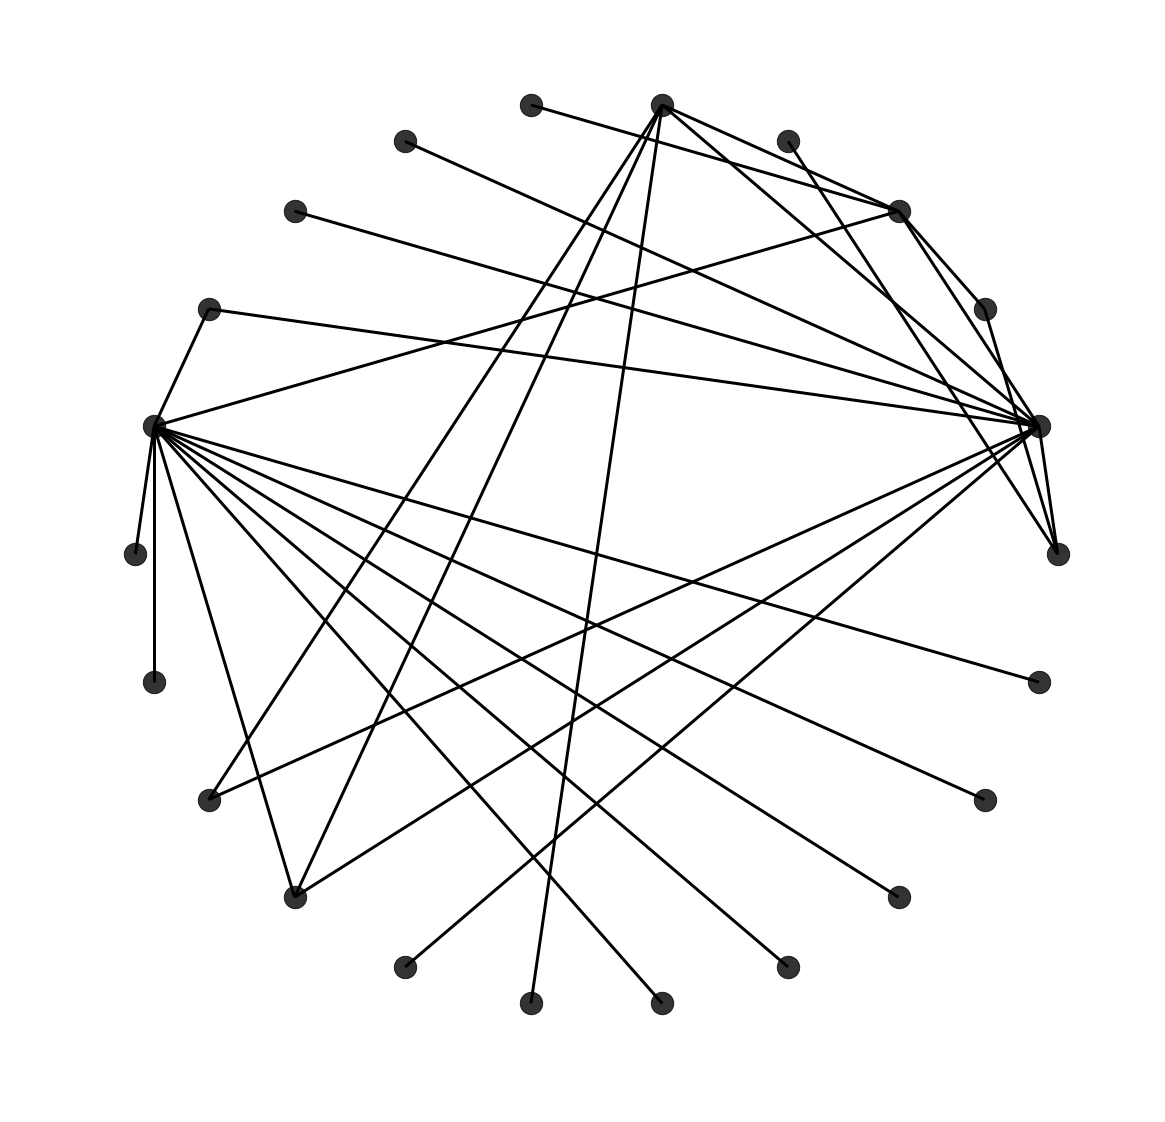

In [16]:
#initial digraph for our proposers and solvers
#thick lines are on the side of the solver
MTd = nx.Graph()
MTd.add_edges_from(fixedSolver)

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(MTd)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(MTd, pos=layout, node_size=500, alpha=0.8, node_color='black')
nx.draw_networkx_edges(MTd, pos=layout, width=3,
                       edge_color='black')
#nx.draw_networkx_labels(MTd, pos=layout, font_size=12)

#plt.show()
plt.savefig("presentationGraph.png", format="PNG")